# Milestone 4 - Independent Project

## Author - Rodolfo Lerma

# Problem

Is there a feature or set of features that would yield to a higher home price for the King County Region?

# Abstract

The purpose of this analysis is to provide insights on what home features (if any) could/would yield to higher home prices in the King County Region (Washington, US).
This analysis was done by using the King County House Sales data set containing data from 2014 to 2015.
The data was obtain from the following website:
[King County House Sales from UW Website](https://startlearning.uw.edu/courses/course-v1:UW+DATASCI410+2019_Winter/courseware/20659760e6504409ace174ccaa96df89/d34173f9caee49dd8cf54784f26b3c35/1?activate_block_id=block-v1%3AUW%2BDATASCI410%2B2019_Winter%2Btype%40vertical%2Bblock%40cbcc25414f264fb99b4b3072d991df46)

This exploration analysis is divided in the following way:

### First look at the data:

- **Data Cleaning**
- **Data Exploration**
    - `Price` Distribution
    - `Price` Time Distribution
    - Location
    - Size and Condition
    
### Analysis:

- **Summary from previous analysis/milestones**
- **Features**
    - Binning Variables
    - Normalized Variables
    - One-hot encode
- **Split Data Set**
- **Train & Test Model**
- **Evaluate Model Performance**
 
### Summary/Conclusion:

- **From the Data Exploration (Milestone 01)**
- **From Analysis (Milestone 02 & 03)**
- **Regarding Model & Predictions (Milestone 04)**

In [1]:
#Loading libraries
import pandas as pd
%matplotlib inline
import numpy.random as nr
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# First look at the data:

In [2]:
#Load File
filename = 'kc_house_data.csv'
house_df = pd.read_csv(filename)

## Data cleaning:

**Since in previous analysis (Milestone 1) it was already presented the *first look to the data* an some reasoning on why the data was filtered in certain way, in this section of the analysis it would be assumed as already covered and understood.**

In [3]:
#Removing outliers based on Price:
LimitHi = np.mean(house_df['price']) + 1*np.std(house_df['price']) #Higher Limit for each of the numeric attributes
LimitLo = np.mean(house_df['price']) - 1*np.std(house_df['price']) #Lower Limit for each of the numeric attributes
FlagBad = (house_df['price'] < LimitLo) | (house_df['price'] > LimitHi) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood]

#Some cleaning of the data (outliers) will be removed since we are interested in the typical market for the region.
FlagBad = (house_df['bedrooms'] > 8) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

FlagBad = (house_df['bathrooms'] > 6) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

FlagBad = (house_df['sqft_lot'] > 50000) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

house_df = house_df.dropna()

#Transforming the variable date into DateTime Variable
house_df.loc[:, 'date'] = pd.to_datetime(house_df.loc[:, 'date'])

#Column price from str to numeric (int64)
house_df['price'] = pd.to_numeric(house_df['price'])

## Data Exploration (Summary Milestone 01)

### `Price` Distribution

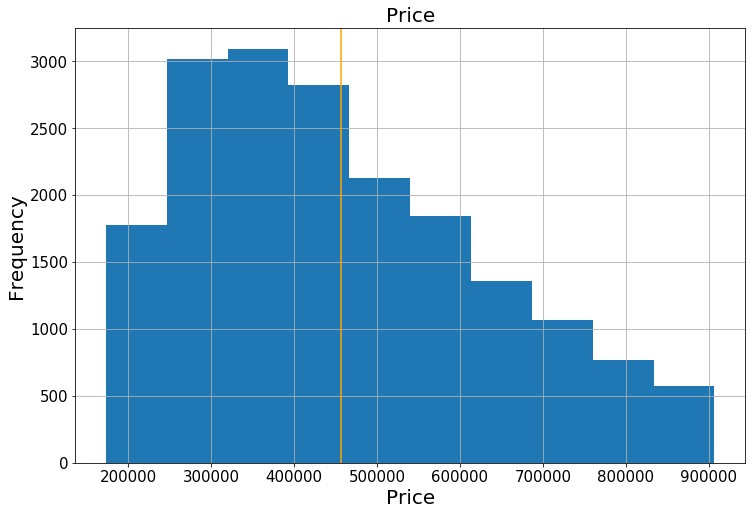

In [4]:
average = house_df['price'].mean()
std_dev = house_df['price'].std()
count = len(house_df['price'])
#ci95_hi = average + (1.96*std_dev/(count**0.5))
#ci95_lo = average - (1.96*std_dev/(count**0.5))
house_df['price'].hist(figsize = (12,8))
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
#plt.axvline(x=ci95_lo, color='red')
#plt.axvline(x=ci95_hi, color='red')
plt.axvline(x=average, color='orange')
plt.grid(True)
plt.show()

As it can be seen the avg `price` of a house in this sample is around ~$457,002 (after outliers were removed).

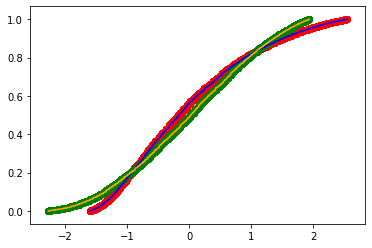

In [5]:
#Normalizing each of the price variables so it is possible to see both with same X axis and compare shapes
from sklearn.preprocessing import scale
#Creating a variable called `price_log`
house_df['price_log'] = np.log(house_df['price'])
norm1_s = scale(house_df['price'])
norm2_s = scale(house_df['price_log'])
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)
    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p, color = 'blue')
    plt.scatter(data_sorted, p, color = 'red')
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    # And the second plot
    plt.plot(data_sorted, p, color = 'orange')
    plt.scatter(data_sorted, p, color = 'green')
plot_cums(norm1_s, norm2_s) 

In [6]:
from scipy.stats import kstest
import scipy.stats as stats
import seaborn as sns
def ks_test_norm(dat, dist = 'norm'):
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
def ks_test_lognorm(data, dist = 'lognorm'):
    count, bins, ignored = plt.hist(data, 50, normed=True, align='mid')
    fig = plt.figure(figsize=(6,4))
    ax = fig.gca() # Define axis
    sns.kdeplot(data, ax = ax)
    params = stats.lognorm.fit(count)
    ks_statisic, pvalue = kstest(count, dist, params)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))

In [7]:
ks_test_norm(norm1_s)

KS-statistic = 0.07474562046835531
P-value = 3.91209908761005e-90


In [8]:
ks_test_norm(norm2_s)

KS-statistic = 0.03855961738398761
P-value = 2.7750561664237636e-24


Based on the **KS-statistic** and the **p-value** on the section above it is possible to see that it seems that the `price` & `price_log` are not quite well represented by a normal distribution. Or another way to see it is:
The K-S statistic is quite large and the p-value is pretty small. The chance is high that we can reject the null hypothesis since the probability that the difference arises by chance alone is high. Therefore we reject the idea that the distribution for our data is **norm**. (strictly speaking)

KS-statistic = 0.09214522682880083
P-value = 0.7549519405609535


C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


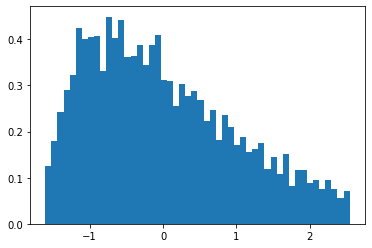

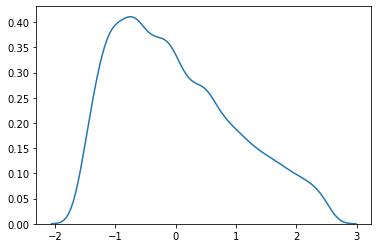

In [9]:
ks_test_lognorm(norm1_s)

The K-S statistic is quite small and the p-value is large. The chance is high that we cannot reject the null hypothesis since the probability that the difference arises by chance alone is high. Therefore we cannot reject the idea that the distribution for our data is **log_norm**.

In other words as expected (as for price variables) the distribution for `price` is a **log_norm** distribution.

In [10]:
house_df.shape

(18459, 22)

After outliers where removed the dataframes ended up containing 18,459 rows.

### `Price` Time Distribution

In [11]:
#Time series plot for Price
#To minimize the noise each data point seen here is the mean of a 2 Weeks sample
house_df2 = house_df.copy()
house_df2.index = house_df2['date']

In [12]:
house_df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
2014-12-09,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2015-02-25,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
2014-12-09,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
2015-02-18,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166


In [13]:
x = house_df2[["price"]].resample("1W").mean()

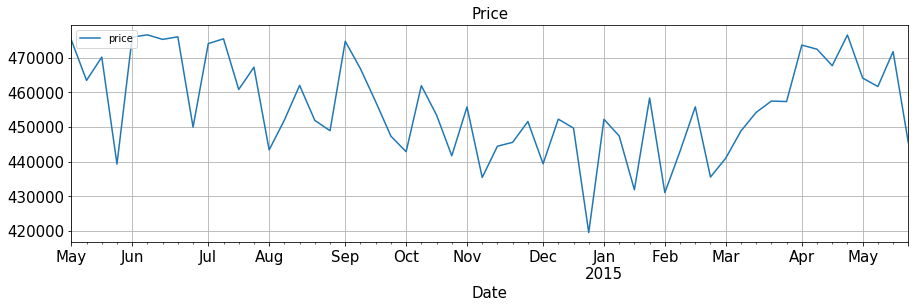

In [14]:
x.plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Price',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

For the year 2014-2015 it is possible to see at least that:
- From December to March it seems that the house market is low.
- From April to Nov it seems that the market is high, being June and July the highest months. 
- This difference is for around ~$25,000 dollars

### Location

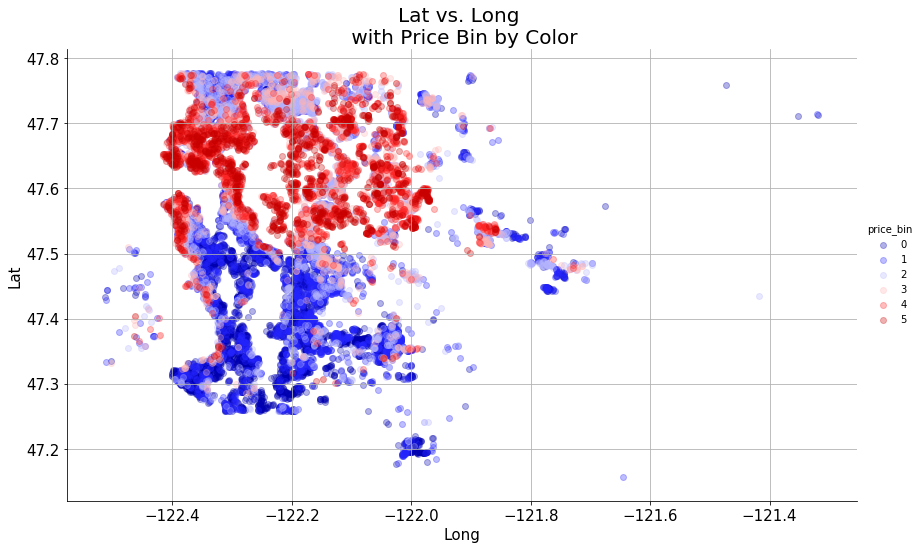

In [15]:
#New Variable Price Bin
house_df.loc[:, 'price_bin'] = pd.cut(house_df.loc[:, 'price'], bins = 6, labels = range(6))

sns.lmplot(x = 'long', y = 'lat', 
           data = house_df, 
           hue = "price_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('Long', fontsize = 15)
plt.ylabel('Lat', fontsize = 15)
plt.title('Lat vs. Long \n with Price Bin by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

**From here it is possible to see the following:**
- There is a location where the price of the houses seems to be  higher than the rest, these tend to be concentrated around the **47.5 - 47.7** `lat`.
- `Long` does not provide a clear difference on what the `price` of a house is going to be.

### Size and Condition

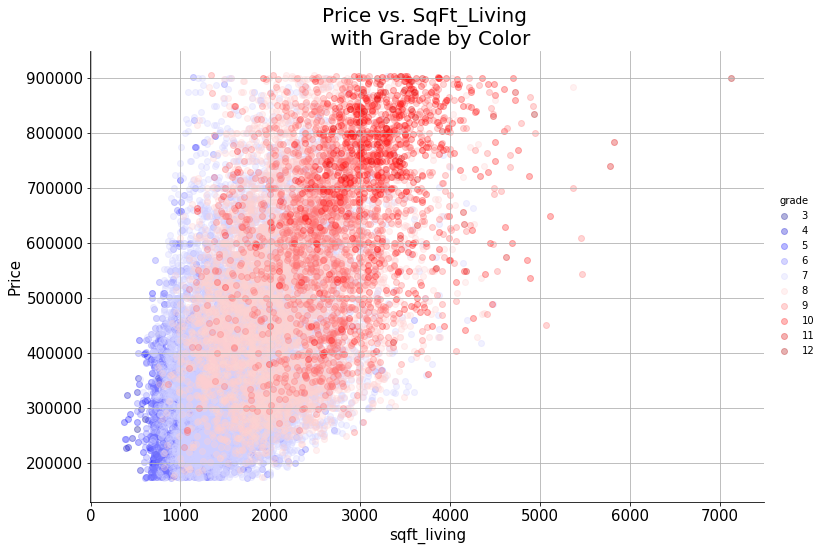

In [16]:
#Scatter plot for HeadCount Vs Hour with GameCode by Color
sns.lmplot(x = 'sqft_living', y = 'price', 
           data = house_df, 
           hue = "grade", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('sqft_living', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title('Price vs. SqFt_Living \n with Grade by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

From the figures above we can see the following:
- There is a direct correlation between `price` and `sqft_living`. As bigger the `sqft_living` as higher the `price`.
- Grade is a clear factor on the `price` as well. And houses with bigger `sqft_living` tend to have a better `grade`.
- Most of the houses in this analysis are between 1000 sqft and 2500 sqft.
- Pretty much the same conclusion can be obtained by using `sqft_above`.

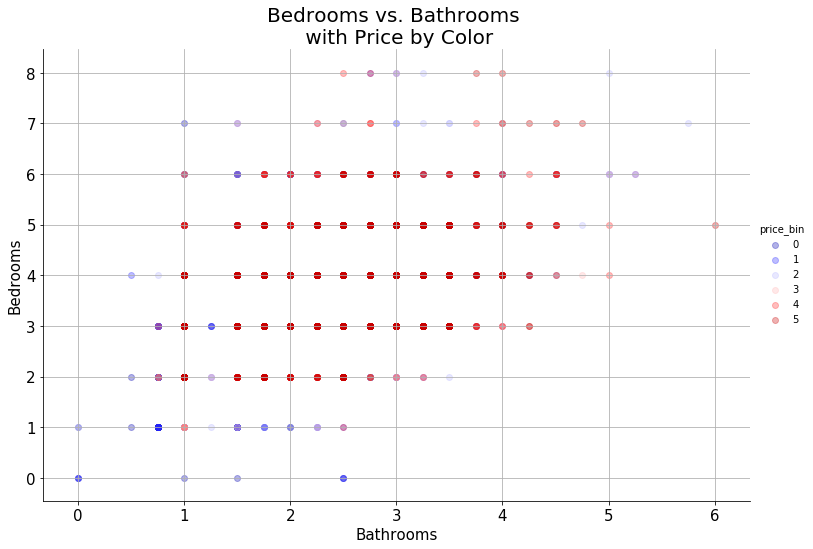

In [17]:
#Scatter plot for HeadCount Vs Hour with GameCode by Color

sns.lmplot(x = 'bathrooms', y = 'bedrooms', 
           data = house_df, 
           hue = "price_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('Bathrooms', fontsize = 15)
plt.ylabel('Bedrooms',fontsize = 15)
plt.title('Bedrooms vs. Bathrooms \n with Price by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

Here it we can see:
 - Most of the houses in this list have between 2 - 4 `bedrooms` (with the highest concentration in 3)
 - Most of the houses have between 1 to 2.5 `bathrooms` (with the highest concentration in 2.5 `bathrooms`)
 - The highest valued homes (`price`) are have between 2 to 4 `bathrooms` and between 3 to 5 `bedrooms`.

# Analysis

For this analysis and for simplification reasons the `price` variable will be binned into 2 categories: 0 & 1 (accessible and expensive).

**Accessible (0):** 0 - 400,000

**Expensive (1):** 400,000 - 900,000

## Summary from previous analysis

In the previous analysis (Milestone 01) it was shown that some of the variables (attributes) in the data set do not add value to predict the `price` of a house. For tha reason those columns were removed from this analysis and are not going to be covered in here.

The variables that will be explore are:

- `price`
- `sqft_living`
- `bedrooms`
- `bathrooms`
- `floors`
- `view`
- `condition`
- `grade`

For simplicity in this analysis categorical variables or variables were values are discrete will be binned into either 2 or 3 bins as needed.

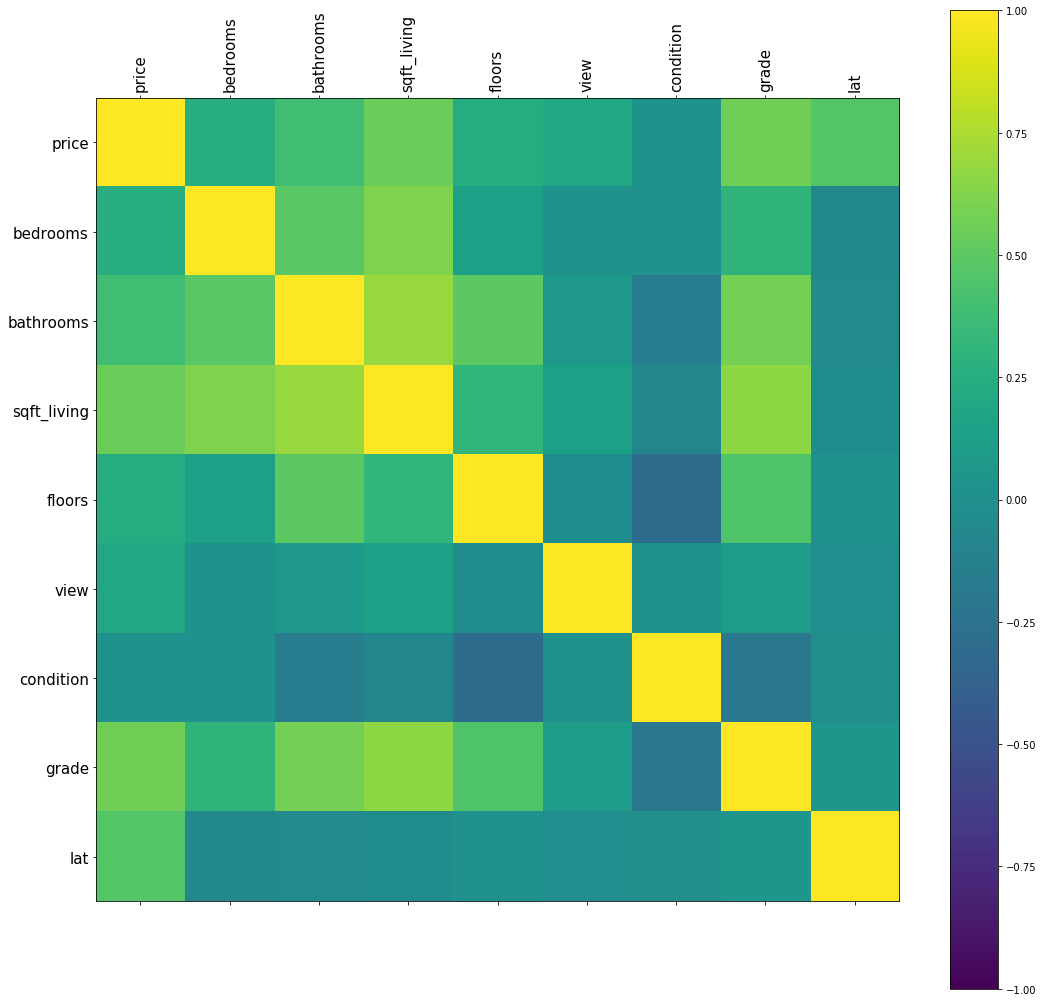

In [18]:
#Numeric columns
cols = ['price','bedrooms','bathrooms','sqft_living','floors','view','condition','grade','lat']
correlations = house_df[cols].corr()
# plot correlation matrix
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols,rotation = 90)
ax.set_yticklabels(cols)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.show()

## Features

We can see some features which are likely to be collinear. The code in the cell below removes these columns. Execute this code to create a data set with reduced features.

### Binning Variables

In [19]:
#Creating bin variables to split the distribution
house_df['condition_binned'] = pd.cut(x=house_df['condition'], bins=[0,3,6], labels = [0, 1])
house_df['grade_binned'] = pd.cut(x=house_df['grade'], bins=[0,6,13], labels = [0, 1])
house_df['bedrooms_binned'] = pd.cut(x=house_df['bedrooms'], bins=[0,3,9], labels = [0, 1])
house_df['bathrooms_binned'] = pd.cut(x=house_df['bathrooms'], bins=[0,2,4,8], labels = [0, 1, 2])
house_df['sqft_living_binned'] = pd.cut(x=house_df['sqft_living'], bins=[0,1500,2500,8000], labels = [0, 1, 2])
house_df['lat_binned'] = pd.cut(x=house_df['lat'], bins=[40,47.5,50], labels = [0, 1])
house_df['floors_binned'] = pd.cut(x=house_df['floors'], bins=[0,2,3,4], labels = [0, 1, 2])
house_df['price_binned'] = pd.cut(x=house_df['price'], bins=[0,400000,1000000], labels = [0, 1])

In [20]:
house_df = house_df.dropna()

In [21]:
label_col = 'price_binned'

labels = house_df[label_col].cat.codes
    
features = []
for c in house_df.columns:
    if c != label_col:
        if str(house_df[c].dtype) == 'category':
            features.append(house_df[c].cat.codes)
        else:
            features.append(house_df[c])

### Normalized Variables

In [22]:
#Normalize numeric values (at least 1 column, but be consistent with other numeric data)
numerics = ['bedrooms','view','condition','grade','sqft_living','bathrooms','lat','floors']
names = "_norm"
for i in numerics:
    house_df[i + names] = (house_df[i] - np.mean(house_df[i]))/np.std(house_df[i])

### One-hot encode

In [23]:
#One-hot encode categorical data

#View
house_df.loc[:, "view0"] = (house_df.loc[:, "view"] == 0).astype(int)
house_df.loc[:, "view1"] = (house_df.loc[:, "view"] == 1).astype(int)
house_df.loc[:, "view2"] = (house_df.loc[:, "view"] == 2).astype(int)
house_df.loc[:, "view3"] = (house_df.loc[:, "view"] == 3).astype(int)
house_df.loc[:, "view4"] = (house_df.loc[:, "view"] == 4).astype(int)

#Condition
house_df.loc[:, "cond1"] = (house_df.loc[:, "condition"] == 1).astype(int)
house_df.loc[:, "cond2"] = (house_df.loc[:, "condition"] == 2).astype(int)
house_df.loc[:, "cond3"] = (house_df.loc[:, "condition"] == 3).astype(int)
house_df.loc[:, "cond4"] = (house_df.loc[:, "condition"] == 4).astype(int)
house_df.loc[:, "cond5"] = (house_df.loc[:, "condition"] == 5).astype(int)

In [24]:
#house_df.dtypes

In [25]:
#house_df = house_df.drop(['floors','condition_binned','grade_binned','bedrooms_binned','bathrooms','sqft_living','price','id','date', 'sqft_lot', 'waterfront', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','sqft_above'], axis=1)

In [26]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,view0,view1,view2,view3,view4,cond1,cond2,cond3,cond4,cond5
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Split Data Set

In [27]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [28]:
#Attributes
attributes = ['bedrooms_norm','grade_norm','bathrooms_norm','sqft_living_norm','lat_norm','floors_norm','view0','view1','view2','view3','view4','cond1','cond2','cond3','cond4','cond5']

#Split the data
variables = house_df[attributes]
label = house_df["price_binned"]
X_train, X_test, y_train, y_test = train_test_split(variables, label, test_size=0.30, random_state=42)

## Train & Test Model

In [29]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors
nbc = GaussianNB() #Naive Bayes
dtc = DecisionTreeClassifier() #DecisionTree
rfc = RandomForestClassifier(n_estimators=estimators, min_samples_split=mss) #Random Forest

#List for Classifiers and Names
header = ["K_Nearest_Neighbors","Naive_Bayes","Decision_Tree","Random_Forest"]
V = [knn, nbc, dtc, rfc]

## Evaluate Model Performance

In [30]:
#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("\n\n#############\Classifier: #############\n", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Ya)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

In [31]:
#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

In [32]:
#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        #ROM_plots(T,y)
    
    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()



#############\Classifier: #############
 K_Nearest_Neighbors


Confusion matrix:
 [[2709  349]
 [ 401 2076]]

TP, TN, FP, FN: 2076 , 2709 , 349 , 401

Accuracy: 0.8645 ,Error Rate: 0.1355 ,Precision: 0.8561 ,Recall: 0.8381 ,F1 Score: 0.847


#############\Classifier: #############
 Naive_Bayes


Confusion matrix:
 [[1258 1800]
 [ 114 2363]]

TP, TN, FP, FN: 2363 , 1258 , 1800 , 114

Accuracy: 0.6542 ,Error Rate: 0.3458 ,Precision: 0.5676 ,Recall: 0.954 ,F1 Score: 0.7117


#############\Classifier: #############
 Decision_Tree


Confusion matrix:
 [[2611  447]
 [ 418 2059]]

TP, TN, FP, FN: 2059 , 2611 , 447 , 418

Accuracy: 0.8437 ,Error Rate: 0.1563 ,Precision: 0.8216 ,Recall: 0.8312 ,F1 Score: 0.8264


#############\Classifier: #############
 Random_Forest


Confusion matrix:
 [[2683  375]
 [ 327 2150]]

TP, TN, FP, FN: 2150 , 2683 , 375 , 327

Accuracy: 0.8732 ,Error Rate: 0.1268 ,Precision: 0.8515 ,Recall: 0.868 ,F1 Score: 0.8597


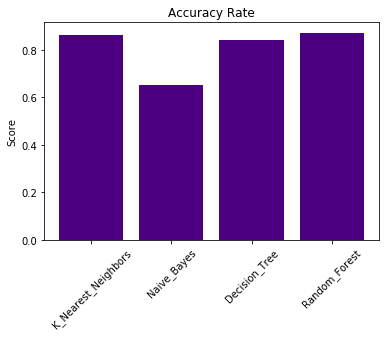

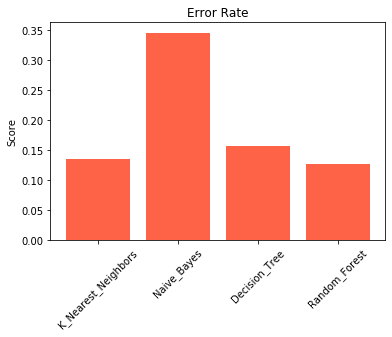

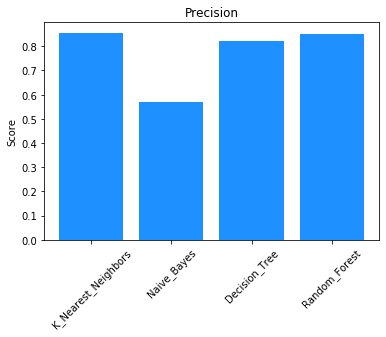

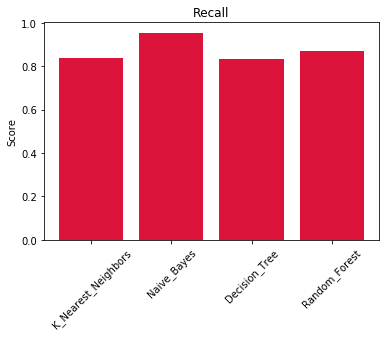

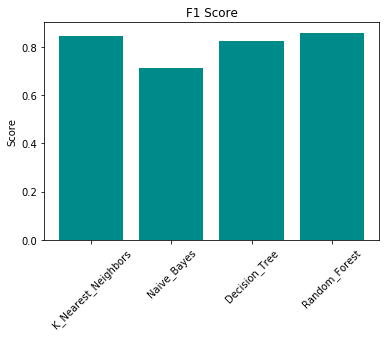

In [33]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train, X_test, y_train, y_test)

# Conclusions/Summary:

## From the Data Exploration:

**Time related:**
- From December to March it seems that the house market is low.
- From April to Nov it seems that the market is high, being June and July the highest months.
- Year of Built does not seem to be a factor on the home `price`.
- 4 to 5 `bedrooms` are the highest valued homes thru time (with a steady behavior).

**Location related:**
- Lat seems to be a better indication for the `price` of a house. Higher value houses tend to concentrate around the 47.5 - 47.7 lat.

**Size and Condition related:**
- `sqft_living` & `grade` are in direct correlation with the home `price`.
- An insight from the variable `condition` is that as long as is at least a 3 you get the home `price` gets to a good level.

**Structure and Distribution:**
- The highest valued homes (`price`) have between 2 to 4 `bathrooms` & 3 to 5 `bedrooms`.
- Houses with 1 and 1.5 `floors` with 4-5 `bedrooms` are the most valued homes.

## From Analysis:

### Quick re-cap of the analysis above:

- The `price` variable was binned into 2 categories: 
    - **Accessible (0):** 0 - 400,000
    - **Expensive (1):** 400,000 - 900,000
- Outliers were identified and later on removed in some variables `price` & `sqft_living` (with no significant impact in the analysis).
- It was decided to normalized the numerical values and used them in the model in lieu of binning the variables.
- The variables used for this Model where:
    - `bedrooms_norm` 
    - `bathrooms_norm`      
    - `sqft_living_norm`    
    - `lat_norm`            
    - `floors_norm`  
    - `grade_norm`  
    - `view (one-hot encoding`                     
    - `condition (one-hot encoding)`                

- No time variables were included as only one year of data was analyzed and overfitting may be a problem.
    - As noted above it seems to be a seasonality effect, which given that we have just one year of data it appears as a trend where from DEC to MAR we have the lowest values and then from APR to NOV the `price` is higher, being JUN & JUL the highest months.

## Regarding Model & Predictions:

- Overall the Random Forest Classifier performed better scores for this analysis, followed by a close second K Nearest Neighbors. As a third place Decision Trees and last one Naive Bayes.
- It is interesting to notice that Naive Bayes is the one with the highest Error Rate (or the lowest Accuracy).
- From this analysis it is possible to offer a more educated answer to the initial question presented in Milestone 01:
    - Is there a feature or set of features that would yield to a higher home price for the King County Region?
        - The answer seems to be YES. There are features than can help to predict the home market at King County with relatively good results (as shown above) and can provide a better guidance to investors and buyers in questions like:
            - Is there a period of time when I can buy a house and the prices are lower?
            - Is there a period of time when I can sell a house and get a better/higher return?
            - Are there some features more important than others to predict the price of a house? 
            - Which ones are more relevant?